In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [22]:
df = pd.DataFrame()

In [23]:
df['X'] = X.reshape(100)
df['y'] = y

In [24]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


**Step 1 : Calculate the mean of column y 'pre1'**

In [25]:
df['pre1'] = df['y'].mean()
df

,X,y,pre1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


**Step 2 : Calculate the residual 'res1'**

In [26]:
df['res1'] = df['y'] - df['pre1']
df

,X,y,pre1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


**Step 3 : Create a decision tree with input column as 'X' and output column as 'res1'**

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
tree1 =  DecisionTreeRegressor(max_leaf_nodes=8)

In [29]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=8,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(136.96363636363637, 199.32, 'X[0] <= -0.36\nmse = 0.056\nsamples = 100\nvalue = -0.0'),
 Text(60.872727272727275, 163.07999999999998, 'X[0] <= -0.43\nmse = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(30.436363636363637, 126.83999999999999, 'mse = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(91.30909090909091, 126.83999999999999, 'mse = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(213.05454545454546, 163.07999999999998, 'X[0] <= 0.322\nmse = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(152.1818181818182, 126.83999999999999, 'X[0] <= -0.235\nmse = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(121.74545454545455, 90.6, 'mse = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(182.61818181818182, 90.6, 'X[0] <= 0.211\nmse = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(152.1818181818182, 54.359999999999985, 'X[0] <= -0.172\nmse = 0.005\nsamples = 42\nvalue = -0.223'),
 Text(121.74545454545455, 18.119999999999976, 'mse = 0.002\nsamples = 10\nvalue = -0.144'),
 Text(182.61818181818182, 18.1199999999

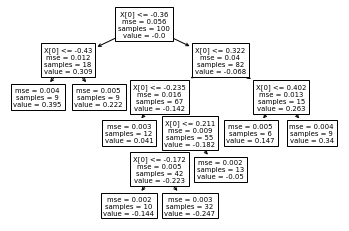

In [30]:
from sklearn.tree import plot_tree
plot_tree(tree1)

**Step 4 : Calculating second prediction 'pre2'**

Learning rate = 1

In [31]:
df['pre2'] = 0.314432	+ tree1.predict(df['X'].values.reshape(100,1))
df

,X,y,pre1,res1,pre2
0,-0.125460,0.051573,0.265458,-0.213885,0.067293
1,0.450714,0.594480,0.265458,0.329021,0.654858
2,0.231994,0.166052,0.265458,-0.099407,0.264758
3,0.098658,-0.070178,0.265458,-0.335636,0.067293
4,-0.343981,0.343986,0.265458,0.078528,0.354938
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.067293
96,0.022733,-0.002305,0.265458,-0.267763,0.067293
97,-0.072459,0.032809,0.265458,-0.232650,0.067293
98,-0.474581,0.689516,0.265458,0.424057,0.709886


**How the decicion tree fits in our data?**

In [32]:
X_test = np.linspace(-0.5, 0.5, 500)

In [33]:
y_pred = 0.314432	+ tree1.predict(X_test.reshape(500,1))

Text(0.5, 1.0, 'X vs y')

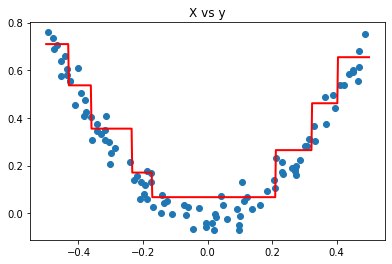

In [34]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

**Step 5 : Calculating the residual 'res2' for the second prediction**

In [35]:
df['res2'] = df['y'] - df['pre2']
df

,X,y,pre1,res1,pre2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.067293,-0.015720
1,0.450714,0.594480,0.265458,0.329021,0.654858,-0.060378
2,0.231994,0.166052,0.265458,-0.099407,0.264758,-0.098706
3,0.098658,-0.070178,0.265458,-0.335636,0.067293,-0.137471
4,-0.343981,0.343986,0.265458,0.078528,0.354938,-0.010952
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.067293,-0.107968
96,0.022733,-0.002305,0.265458,-0.267763,0.067293,-0.069598
97,-0.072459,0.032809,0.265458,-0.232650,0.067293,-0.034485
98,-0.474581,0.689516,0.265458,0.424057,0.709886,-0.020370


**Step 6 : Create a second decision tree with input column as 'X' and output column as 'res2'**

In [36]:
tree2 =  DecisionTreeRegressor(max_leaf_nodes=8)

In [37]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=8,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(111.60000000000001, 201.90857142857143, 'X[0] <= 0.47\nmse = 0.003\nsamples = 100\nvalue = -0.049'),
 Text(74.4, 170.84571428571428, 'X[0] <= -0.46\nmse = 0.003\nsamples = 98\nvalue = -0.051'),
 Text(37.2, 139.78285714285715, 'mse = 0.001\nsamples = 4\nvalue = 0.013'),
 Text(111.60000000000001, 139.78285714285715, 'X[0] <= -0.43\nmse = 0.003\nsamples = 94\nvalue = -0.054'),
 Text(74.4, 108.72, 'mse = 0.001\nsamples = 5\nvalue = -0.099'),
 Text(148.8, 108.72, 'X[0] <= -0.397\nmse = 0.003\nsamples = 89\nvalue = -0.051'),
 Text(111.60000000000001, 77.65714285714284, 'mse = 0.003\nsamples = 4\nvalue = 0.007'),
 Text(186.0, 77.65714285714284, 'X[0] <= 0.104\nmse = 0.003\nsamples = 85\nvalue = -0.054'),
 Text(111.60000000000001, 46.59428571428572, 'X[0] <= -0.052\nmse = 0.002\nsamples = 51\nvalue = -0.063'),
 Text(74.4, 15.531428571428563, 'mse = 0.002\nsamples = 36\nvalue = -0.053'),
 Text(148.8, 15.531428571428563, 'mse = 0.002\nsamples = 15\nvalue = -0.087'),
 Text(260.4000000000000

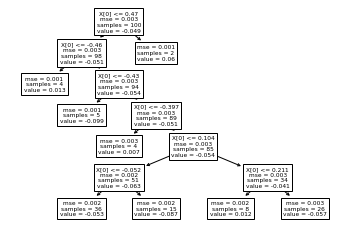

In [38]:
from sklearn.tree import plot_tree
plot_tree(tree2)

**How the second decision tree fits in our data?**

In [39]:
y_pred = 0.314432	+ sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

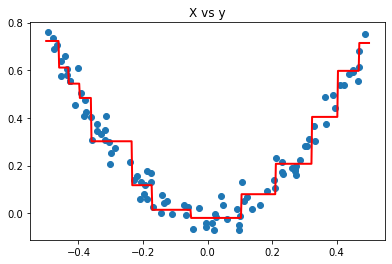

In [40]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')